## Bussiness Problem

**What is Fake News?**

Fake news is the deliberate presentation of (typically) false or misleading claims as news, where the claims are misleading by design.

**How News and digital medium evolved?**

- The news media evolved from newspapers, tabloids, and magazines to a digital form such as online news platforms, blogs, social media feeds, and many mobile app. News outlets benefitted from the widespread use of social media/mobile  platforms by providing updated news in near real time to its subscribers.

- It became easier for consumers to acquire the latest news at their fingertips. So, these digital media platforms have become very powerful due to their easy accessibility to the world and  ability to allow users to discuss and share ideas and debate over issues such as democracy, education, health, research and history.

- Apart from advantages, false/fake news article on digital platforms have become very common. It is mainly used with a negative intent for their personal benifit such as political and finacial benefit by creating biased opinions, manipulating mindsets, and spreading absurdity.

**How big this Problem ?**

- With the rapid adoption of Internet, social media and digital platforms (such as Facebook, Twitter, news portals or any other social media), Anyone can spread untrue and biased information. It is virtually impossible to prevent Fake News from being created. Moreover, there has been a rapid increase in the spread of fake news in the last decade. It's not limited any one domain such as Politics but it covers various other domains such as Sports, Health, History, Entertainment and Science and Research.
- If we take example of 2016 US presidential election, there were lot of biased and fake news published to influence voters.
- Another example could be of COVID-19, we generally came accross many misleading/fake news everyday which can have serious consequences and may lead panic among people, which would result in spreading pandemic more rapidly.

**What is Solution?**

- Therefore, It is important to identify and differentiate Fake News from Real News. One of the way is to determine by expert and fact check of every news, but this is time consuming and requires skills which can not be shared. Another way is- we can automate the detection of Fake News by using the techniques of Machine learning and Artificial Intelligence.

- The Online News content has diverse unstructure format data(such as documents, videos, and audios). Hence here we will concentrate on text format news. With the advancement of and Natural language processing, it is possible that we can identify the deceptive and fake nature of article or sentence.

- There are wide spread study and experiment to identify the Fake news for all medium(Video, audio and Text) news. In our study we used [Fake news](https://www.kaggle.com/c/fake-news/data) to classify unreliable news article as Fake news using Deep learning Technique - Sequence to Sequence programming.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
def read_data(filename,**kwargs):
    raw_data=pd.read_csv(filename,**kwargs)
    return raw_data

In [84]:
# Setup Directory Path

parent_dir = '/content/drive/My Drive/Colab Notebooks/Projects-NLP/fake-news-classification-using-deeplearning'
input_dir = parent_dir +'/input/'
output_dir = parent_dir + '/output/'
model_dir = parent_dir + '/models/'
image_dir = parent_dir + '/images/'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
news_train_df = read_data('/content/drive/My Drive/Colab Notebooks/Projects-NLP/fake-news-classification-using-deeplearning/input/train.csv')
news_test_df = read_data('/content/drive/My Drive/Colab Notebooks/Projects-NLP/fake-news-classification-using-deeplearning/input/test.csv')
news_test_labels_df = read_data('/content/drive/My Drive/Colab Notebooks/Projects-NLP/fake-news-classification-using-deeplearning/input/submit.csv')
news_test_df['label'] = news_test_labels_df['label']
print(" Shape of News Training data :: ", news_train_df.shape)
print(" Shape News Test data ", news_test_df.shape)
print(" Shape News Test labels", news_test_labels_df.shape)

 Shape of News Training data ::  (20800, 5)
 Shape News Test data  (5200, 5)
 Shape News Test labels (5200, 2)


In [7]:
news_train_df.head()
news_train_df.tail()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

id                                              title  \
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1

In [8]:
news_test_df.head()
news_test_df.tail()

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                      NaN  Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   

   label  
0      0  
1      1  
2      0  
3      1  
4      1

id                                              title  \
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                   author                                               text  \
5195           Jody Rosen  Of all the dysfunctions that plague the world’...   
5196  Sheryl Gay Stolberg  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...   
5197         Mike McPhate  Good morning. (Want to get California Today by...   
5198                  NaN  « Previous - Next » 300 US Marines To Be Deplo...   
5199          Teddy Wayne  Perhaps you’ve seen the new TV series whose pi...   

      label  
5195      0  
5196      1  
5197      0  
5198      1  
5199      0

In [9]:
news_test_labels_df.head()
news_test_labels_df.tail()

id  label
0  20800      0
1  20801      1
2  20802      0
3  20803      1
4  20804      1

id  label
5195  25995      0
5196  25996      1
5197  25997      0
5198  25998      1
5199  25999      0

#### Note : There no label for test dataset., So we will use train set for training and validation after split.

In [10]:
def create_features(df):
    df['text_length'] = df.text.str.split().str.len()
    df['title_length'] = df.title.str.split().str.len()
    return df

In [11]:
news_train_df = create_features(news_train_df)
news_test_df = create_features(news_test_df)

In [12]:
#Text Word startistics: min.mean, max and interquartile range
news_train_df['text_length'].describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text_length, dtype: float64

In [13]:
#Title startistics
news_train_df['title_length'].describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title_length, dtype: float64

The statistic of Train and Test datasets are following:
1. Attribute **text** having more words count with average of 760 words and 75% are less than 1000 word.
2. Attribute **title** are small sentence with average of 12 words and 75% are less than 15 only.

From following columns ['id', 'title', 'author', 'text', 'label'] we will not include id and author.

**Our experiment would be with both text and title together**

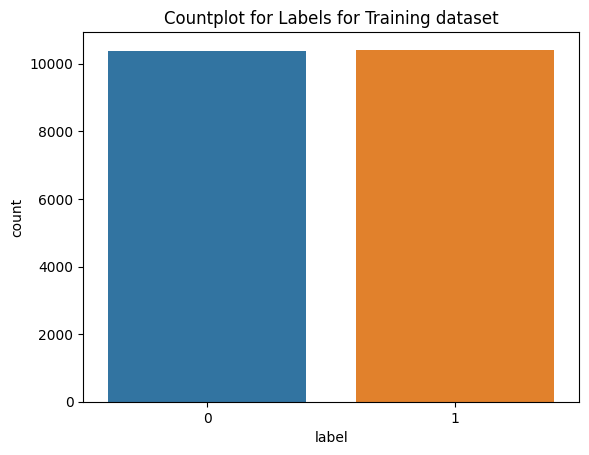

In [14]:
sns.countplot(x='label', data=news_train_df)
plt.title('Countplot for Labels for Training dataset')
plt.show();

**We can see that dataset is balanced. So, we need not use Syntehtic data to improve our model performance**

## Approach :  Sequence Problem Neural Network

### Sequence Problem

**Sequences** is a predictive modelling problem, in which you have a certain sequence of entries, and the task is to predict the next sequence. The input and output sequence could vary one to many sequence. The difficulty of this problem lies in the fact that sequences can vary in length.
- Example of sequence problem:
    - Text classification, snetimenent analysis: Where text are sequence of word, which could be long sentence
    - Timeseries prediction: Stock, financial prediction
    - Music generation
    - Question Answering, Language modeling, Neural machine translation

- Types of Sequence Problem
    1. One-to-One: Where there is one input and one output. Typical example of a one-to-one sequence problems is the case where you have an image and you want to predict a single label for the image.
    
    2. Many-to-One: In many-to-one sequence problems, we have a sequence of data as input and we have to predict a single output. Text classification is sequence problems where we have an input sequence of words and we want to predict a single output tag.
    
    3. One-to-Many: In one-to-many sequence problems, we have single input and a sequence of outputs. A typical example is an image and its corresponding description.
    
    4. Many-to-Many: Many-to-many sequence problems involve a sequence input and a sequence output. For instance, stock prices of 7 days as input and stock prices of next 7 days as outputs.

**Note: Challenge is to handle large input and output sequence.**

### Simple RNN, LSTM and GRU

### RNN :  Recurrent Neural Network

Recurrent Neural Networks (RNN) are designed to work with sequential data. RNN uses the previous information in the sequence to produce the current output. To understand this better takes an example sentence.

    “My class is the best class.”

At the time(T0 ), the first step is to feed the word “My” into the network. the RNN produces an output.

At the time(T1 ), then at the next step we feed the word “class” and the activation value from the previous step. Now the RNN has information of both words “My” and “class”.

And this process goes until all words in the sentence are given input. You can see the animation below to visualize and understand.

#### RNN Architecture : It takes input from the previous step and current input.

#### Note:
1. RNN weights and bias for all the nodes in the layer are same.
2. In case of more steps it suffers from vanishing gradient more than other neural network architectures.

Read below article to understand more about it <a href="https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9">Illustrated Guide to Recurrent Neural Networks</a>


**Training a neural network has three major steps:**
- First, it does a forward pass and makes a prediction.
- Second, it compares the prediction to the ground truth using a loss function. The loss function outputs an error value which is an estimate of how poorly the network is performing.
- Last, it uses that error value to do back propagation which calculates the gradients for each node in the network.

**Vanishing Gradient**
- The gradient is the value used to adjust the networks internal weights, allowing the network to learn. The bigger the gradient, the bigger the adjustments and vice versa.
- This is where the problem lies - When doing back propagation, each node in a layer calculates it’s gradient with respect to the the gradients in the previous layer. So when the gradient is smaal, adjustments to the previous hidden layers are small, and so the adjustments in gradient to the current layer would be even smaller.
- This causes gradients to exponentially shrink as it back propagates. The earlier layers fail to learn anything new as the internal weights were literally same due to extremely small gradients. And this is the vanishing gradient problem.

- To train a recurrent neural network, you use an application of back-propagation called back-propagation through time. The gradient values will exponentially shrink as it propagates through each time in each step.


1. The **current** state is a function of the **previous** state and the current input:
$h_t = \sigma(W_{R}h_{t-1} + W_{F}x_t)$
2. The gradient of the loss $E_t$ at time $t$ on $W_{R}$ is a function of the current hidden state and model predictions $\hat{y}_t$ at time t:
$\frac{\partial E_t}{\partial W_{R}} = \frac{\partial E_t}{\partial \hat{y}_t}\frac{\partial\hat{y}_t}{\partial h_t}\frac{\partial h_t}{\partial W_{R}}$
3. Substituting (1) into (2) results in a **sum over all previous time-steps**:
$\frac{\partial E_t}{\partial W_{R}} = \sum\limits_{k=0}^{t} \underbrace{\frac{\partial E_t}{\partial \hat{y}_t}\frac{\partial\hat{y}_t}{\partial h_t}\frac{\partial h_t}{\partial h_k}\frac{\partial h_k}{\partial W_{R}}}_\text{product of gradient terms}$

The problem is that $\frac{\partial h_t}{\partial h_k} = \Pi_j \frac{\partial h_j}{\partial h_{j-1}}$ for j from $k + 1$ to $t$.  Because of this **repeated multiplicative interaction**, as the sequence length $t$ gets longer, the gradients themselves can get diminishingly small (**vanish**) or grow too large and result in numeric overflow (**explode**).

**Two main Issues with RNN:**
1. Due to short-term memory it’s too difficult for RNN to learn to preserve information over many timesteps.
2. Hidden state is constently being rewritten due to vanishing gradient.

**So need to solve these two issue using Memory and Gated Mechanism, which can handle long sequence and their gradient. These two issue can be resolved by using LSTM and GRU which uses multiple gate/memory cells.**


## LSTM: Long Short Time Memory

An LSTM has a similar control flow as a recurrent neural network but the difference is the operation within the LSTM’s cells that it propogates long sequence information. It solve the problem of short-term memory and vanishing gradients.

**Forget gate**
It controls what is kept vs forgotten, from previous cell state. In laymen terms, it will decide how much information from the previous state should be kept and forget the remaining information.

**Input gate**
To update the cell state, It controls what new information will be added into cell state.

**Output gate**
It controls which parts of the cell are output to the hidden state. It will determine what the next hidden state will be.

**Cell State**
This is memory state, which will carry forward throught all the layers and maintain long sequences.

**Hidden state** : The final hidden state is dependent on the updated cell state, previous hidden state and current input content.

<b>Summary</b>

- LSTMs have three types of gates: input gates, forget gates, and output gates that control the flow of information.
- The hidden layer output of LSTM includes the hidden state and the memory cell. Only the hidden state is passed into the output layer. The memory cell is entirely internal.
- Cell state captures both short-term and long-term dependencies in sequences.

Read below article to understand more about it <a href="https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21">Illustrated Guide to LSTM’s and GRU’s</a>

### GRU: Gated Recurrent Units
The workflow of GRU is same as LSTM but the difference is in the operations inside the GRU unit. Let’s see the architecture of it.

GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.

**Update gate** :
The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add.

**Reset gate** :
The gate is used to decide whether the previous state is important or not and decide how much past information to forget.

**Hidden state** : It is just simply the same as the hidden state(activation) of RNN, which acts like neural network menory. The final hidden state is dependent on the update gate. Remove some content from hidden state, and write some new content.

- In GRU the final cell state is directly passing as the activation to the next cell.

<b>Summary</b>
- If sigmoid(update gate) close to 1, then we can copy information in that unit through many steps!
    Sigmoid Controls how much of past state should matter now.
- If reset close to 0, ignore previous hidden state (allows the model to drop information that is irrelevant in the future).
- Reset gates help capture short-term dependencies in sequences.
- Update gates help capture long-term dependencies in sequences.

Read below article to understand more about it <a href="https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21">Illustrated Guide to LSTM’s and GRU’s</a>

**Many to One Sequence problem**, There news article would be sequence of multiple words and output would be only one.
Identify when an article might be fake news

### Steps to Build Many to One Sequence Problem for Text
1. Clean Datasets: remove unused rows and columns, imput null etc
2. Preprocessing: NLTK processing,
3. Data Preperation
    - Vectorization, Sequence data preperation, Padding to have equal sequence length
4. Sequence representation:
    - Onehot ecoding, Word embedding etc
5. Build Emedding Layer
6. Build Neural Network model
7. Compile and fit model
8. Hyperparamter tunning
9. Model Performance

## Clean Datasets:
   - Drop unused row and columns
   - Null value imputation
   - Remove special characters
   - Remove stop words

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from collections import Counter
import re

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
## Constants Used for cleaning the datasets

column_names = ['id', 'title', 'author', 'text', 'label']
remove_columns = ['id','author','text_length', 'title_length']
categorical_features = []
target_col = ['label']
text_features = ['title', 'text']

In [18]:
# Impute null values with None
def set_null_values(feature_df, text_features):
    for col in text_features:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df


def clean_datasets(df, column_to_remove, text_features):
    # Removed unused clumns
    df = df.drop(column_to_remove, axis=1)

    # Impute null values with None
    df = set_null_values(df, text_features)
    return df

In [19]:
# Cleaning text from unused characters
def clean_text_data(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    # text = ' '.join(text)
    return text

In [20]:
## Nltk Preprocessing include:
# Stop words,
# Stemming and
# Lemmetization

# For our project we use only Stop word removal
def data_preprocesing(text):
    text = clean_text_data(text)
    word_lemantize = WordNetLemmatizer()     # Lemmetization
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    port_stemmer = PorterStemmer()
    text = [port_stemmer.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([word_lemantize.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [23]:
df = clean_datasets(news_train_df, remove_columns, text_features)
df_test = clean_datasets(news_test_df, remove_columns, text_features)

df["text"] = df.text.apply(data_preprocesing)
df_test["text"] = df_test.text.apply(data_preprocesing)

df["title"] = df.title.apply(data_preprocesing)
df_test["title"] = df_test.title.apply(data_preprocesing)

In [24]:
df.head()
df.tail()

title  \
0  house dem aide didnt even see comeys letter ja...   
1   flynn hillary clinton big woman campus breitbart   
2                              truth might get fired   
3   15 civilian killed single u airstrike identified   
4  iranian woman jailed fictional unpublished sto...   

                                                text  label  
0  house dem aide didnt even see comeys letter ja...      1  
1  ever get feeling life circle roundabout rather...      0  
2  truth might get fired october 29 2016 tension ...      1  
3  video 15 civilian killed single u airstrike id...      1  
4  print iranian woman sentenced six year prison ...      1

title  \
20795       rapper ti trump poster child white supremacy   
20796    nfl playoff schedule matchup odds new york time   
20797  macys said receive takeover approach hudson ba...   
20798          nato russia hold parallel exercise balkan   
20799                                     keep f35 alive   

                                                    text  label  
20795  rapper unloaded black celebrity met donald tru...      0  
20796  green bay packer lost washington redskin week ...      0  
20797  macys today grew union several great name amer...      0  
20798  nato russia hold parallel exercise balkan 1102...      1  
20799  david swanson author activist journalist radio...      1

In [25]:
df_test.head()
df_test.tail()

title  \
0  specter trump loosens tongue purse string sili...   
1  russian warship ready strike terrorist near al...   
2  nodapl native american leader vow stay winter ...   
3  tim tebow attempt another comeback time baseba...   
4                        keiser report meme war e995   

                                                text  label  
0  palo alto calif year scorning political proces...      0  
1  russian warship ready strike terrorist near al...      1  
2  video nodapl native american leader vow stay w...      0  
3  first dont succeed try different sport tim teb...      1  
4  42 min ago 1 view 0 comment 0 like first time ...      1

title  \
5195    bangladeshi traffic jam never end new york time   
5196  john kasich sign one abortion bill ohio veto r...   
5197       california today exactly sushi new york time   
5198        300 u marine deployed russian border norway   
5199                 awkward sex onscreen new york time   

                                                   text  label  
5195  dysfunction plague world megacities none may p...      0  
5196  washington gov john kasich ohio tuesday signed...      1  
5197  good morning want get california today email h...      0  
5198  previous next 300 u marine deployed russian bo...      1  
5199  perhaps youve seen new tv series whose pilot e...      0

## Explorative Data Analysis
- Univariate Analysis: Statistical Analysis of Text, Word cloud
- Bivariate Analysis : Bigram and Trigram

### Single word word cloud
Most frequent word appear with Bold and bigger font.
#### Word cloud for all word in datasets

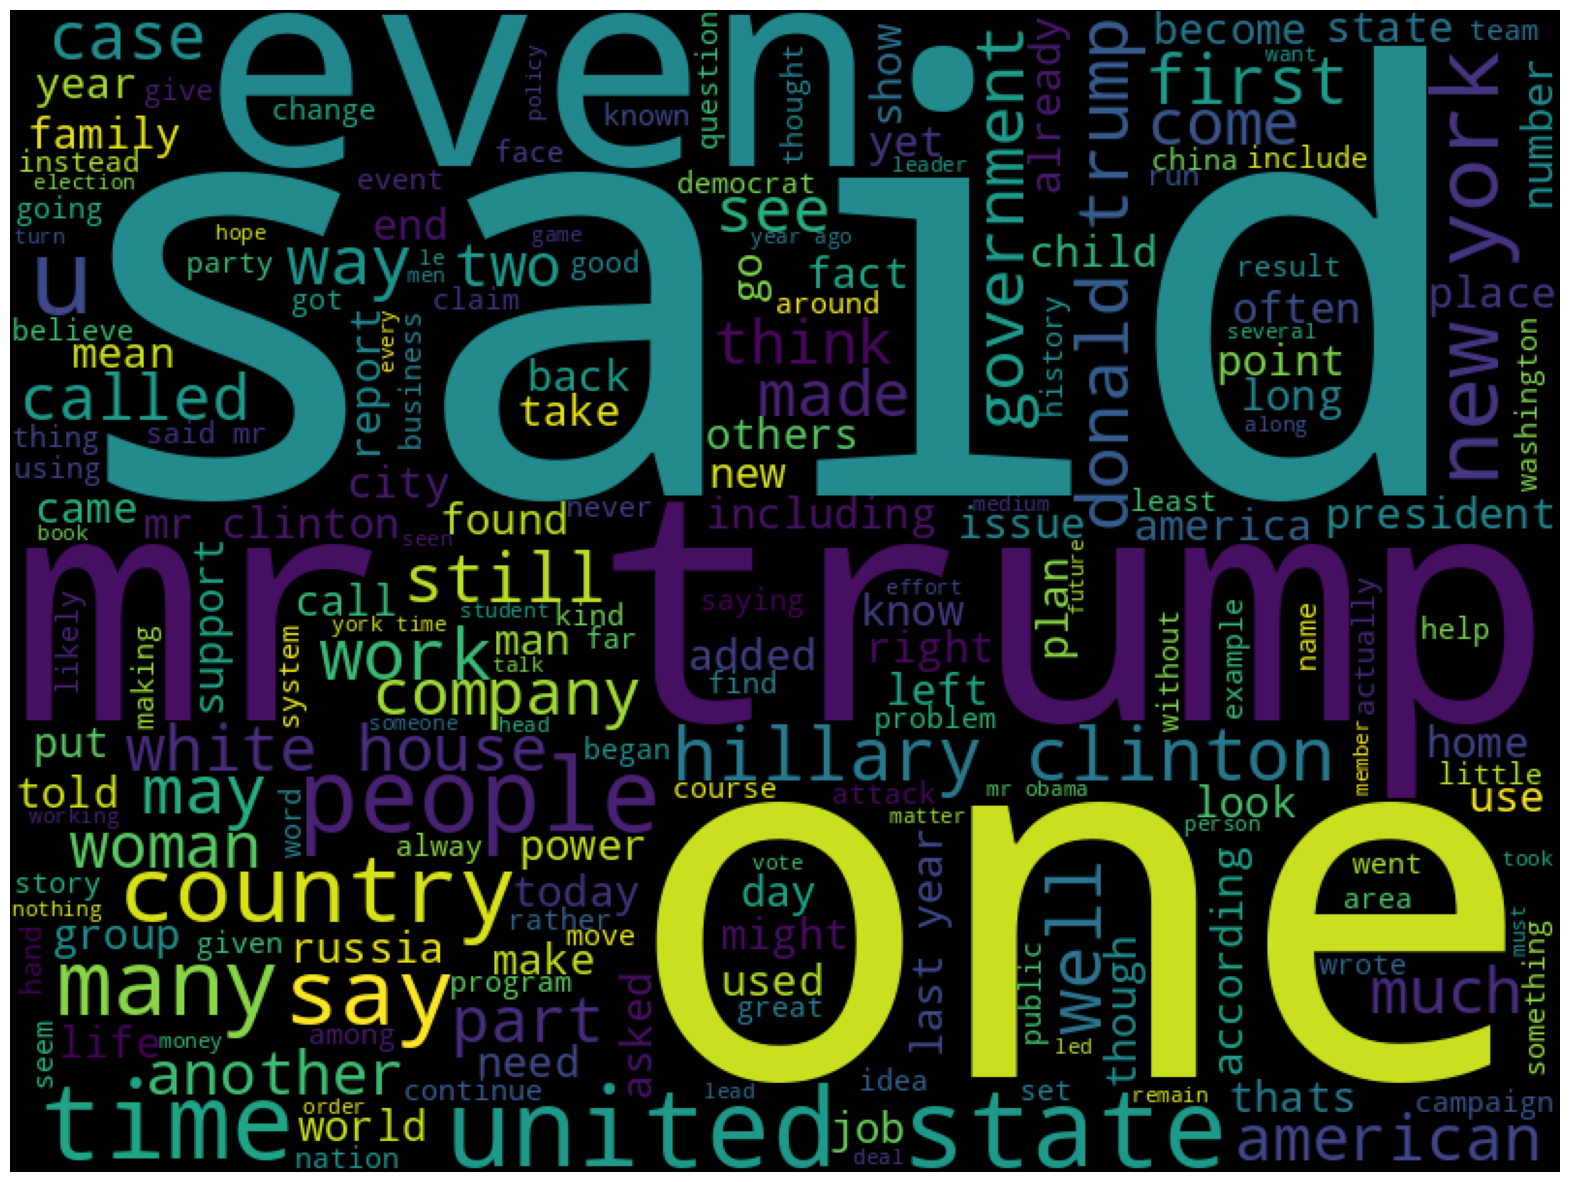

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( background_color='black', width=800, height=600)

text_cloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show();

### Word cloud for True label news only

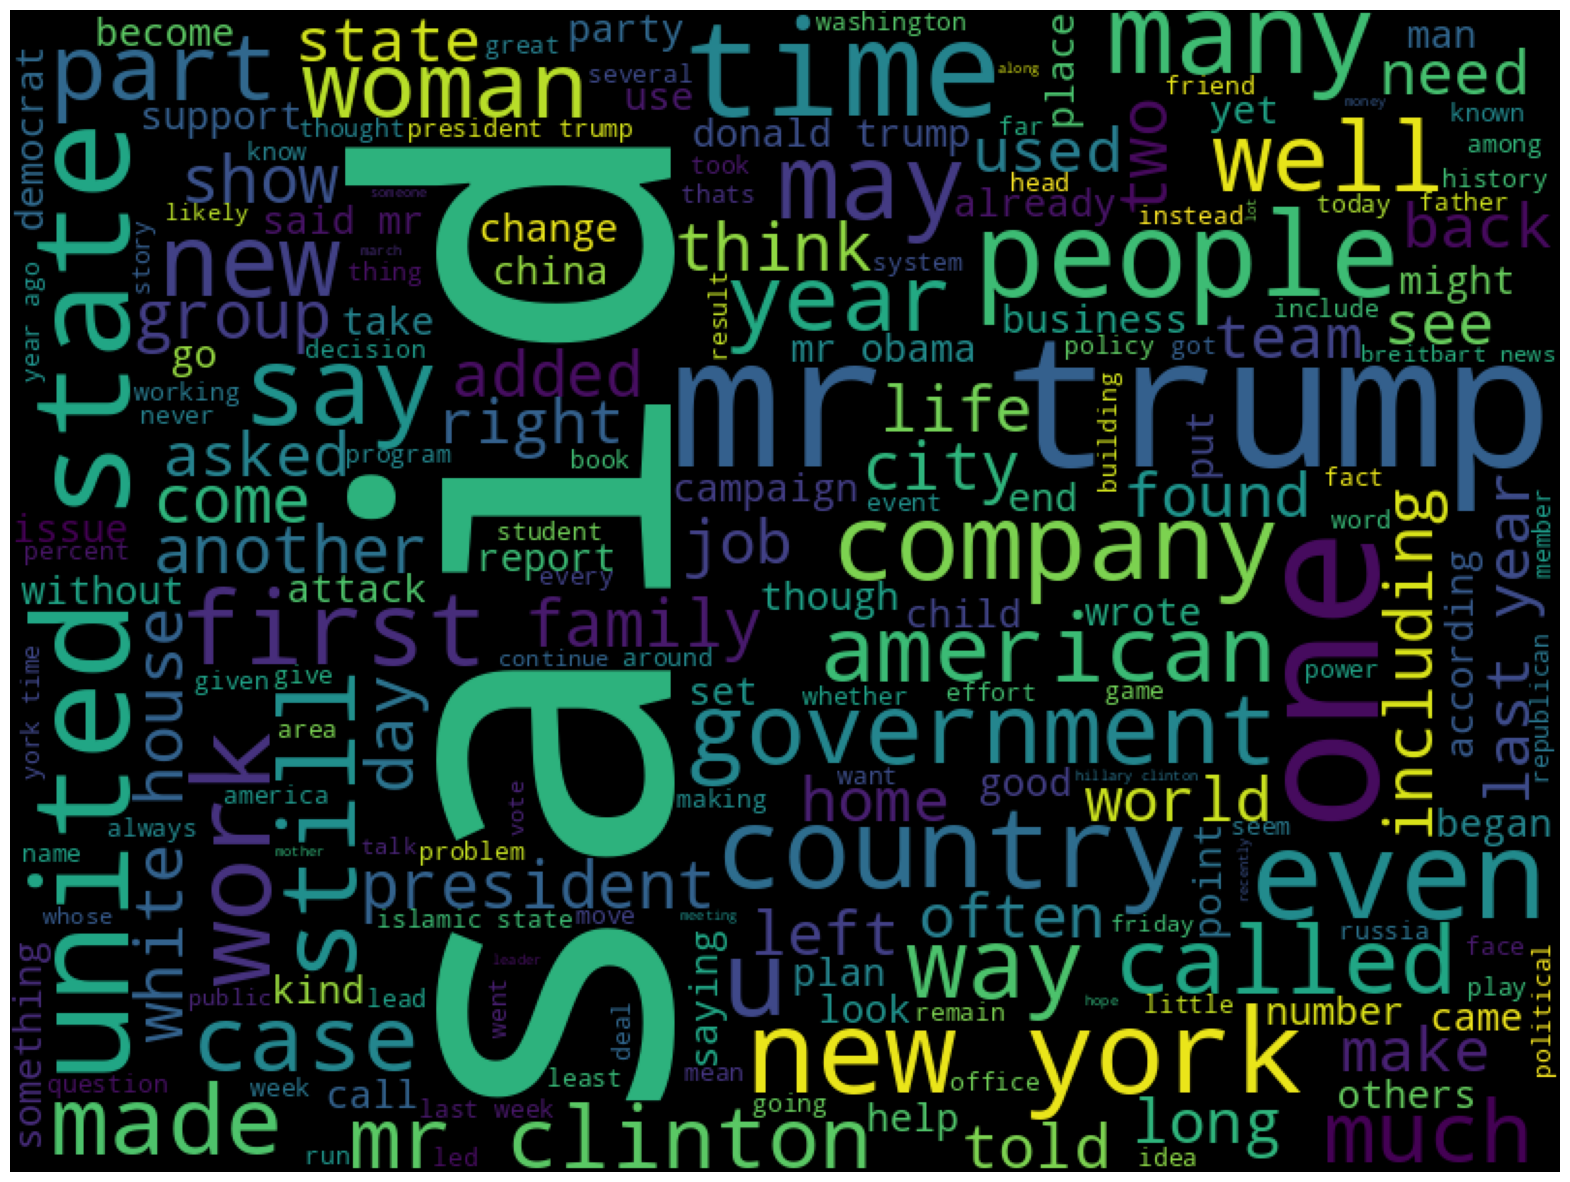

In [27]:
true_news = ' '.join(df[df['label']==0]['text'])
wc = wordcloud.generate(true_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show();

### Word cloud for Fake label news only

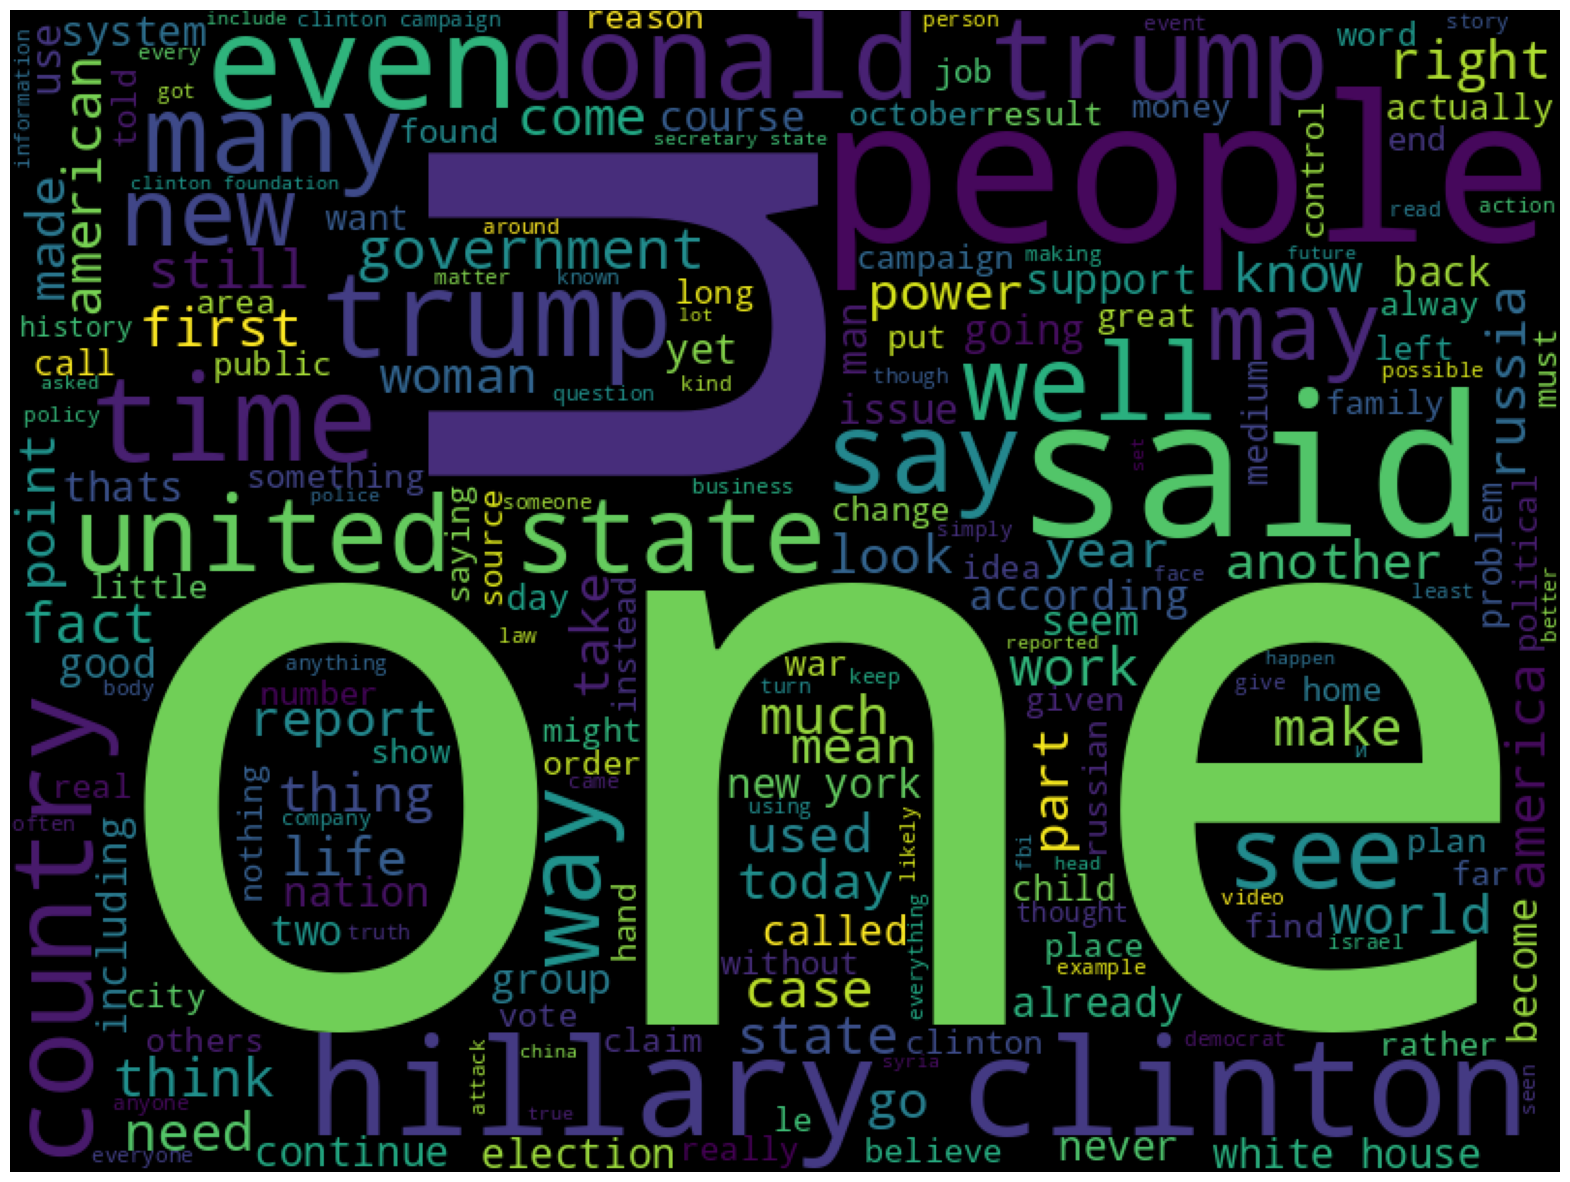

In [28]:
fake_news = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show();

### N-Gram

An n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application.

### Most frequent Bigram(Two word combination) of True label

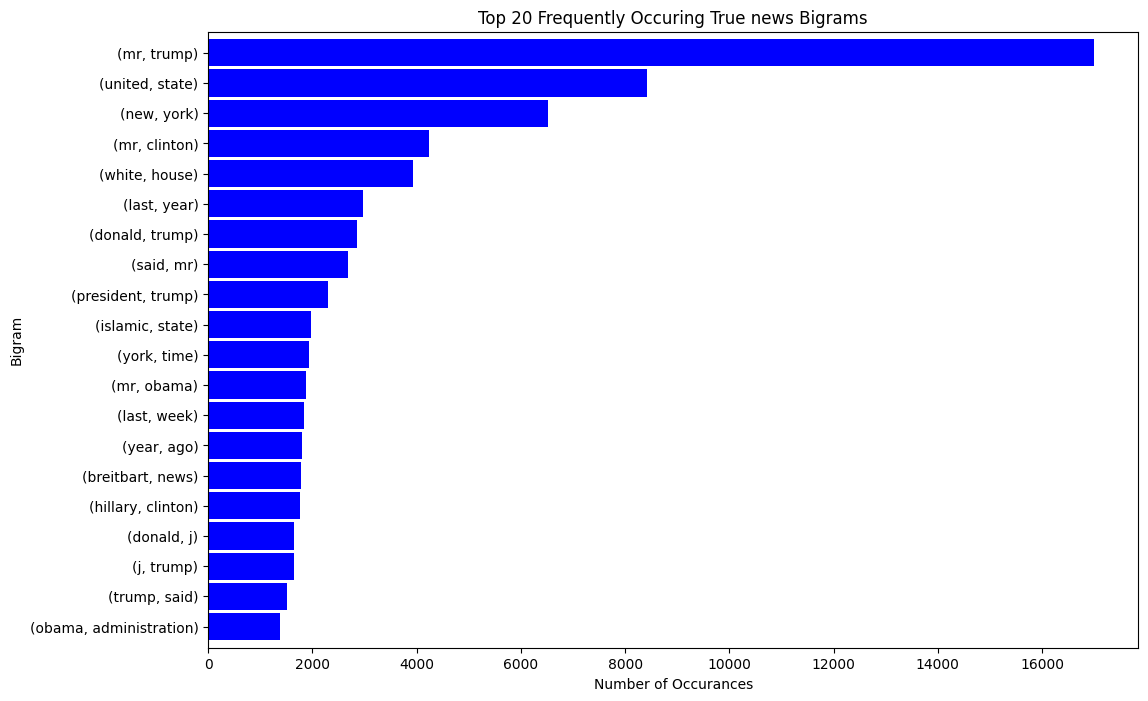

In [29]:
true_bigrams = (pd.Series(nltk.ngrams(true_news.split(), 2)).value_counts())[:20]
true_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring True news Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')
plt.show();

### Most frequent Bigram(Two word combination) of Fake label

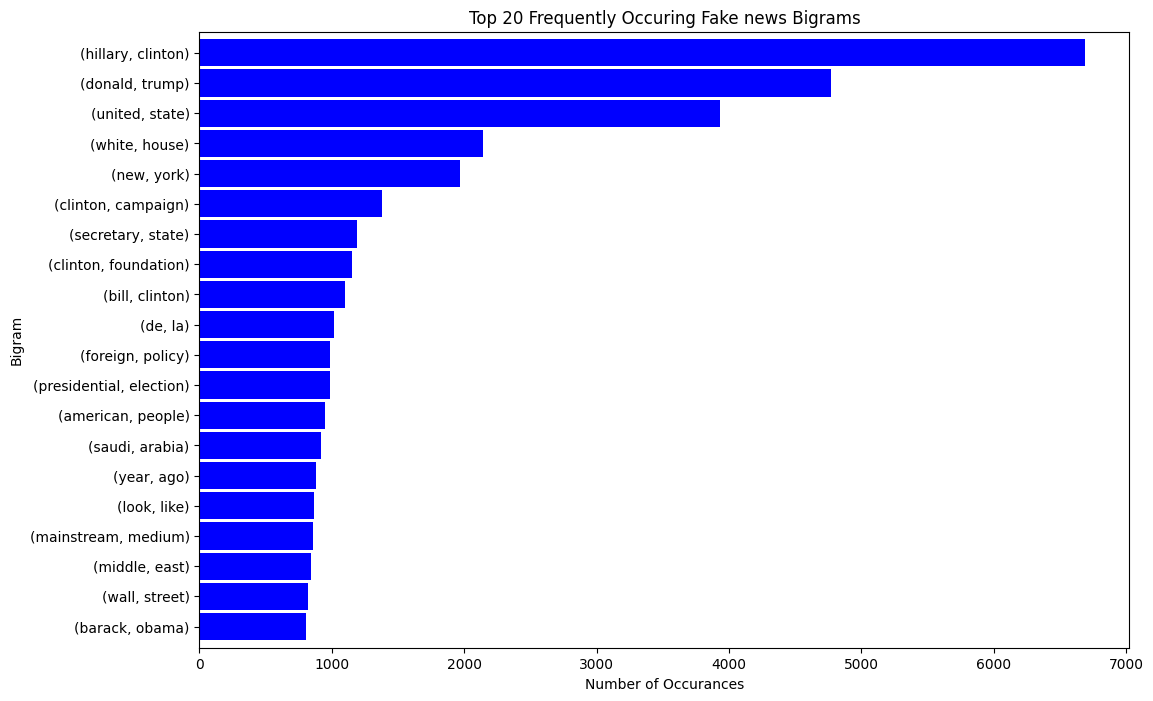

In [30]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_news.split(), 2)).value_counts())[:20]
fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring Fake news Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')
plt.show();

### Most frequent Trigram(Three word combination) of True label

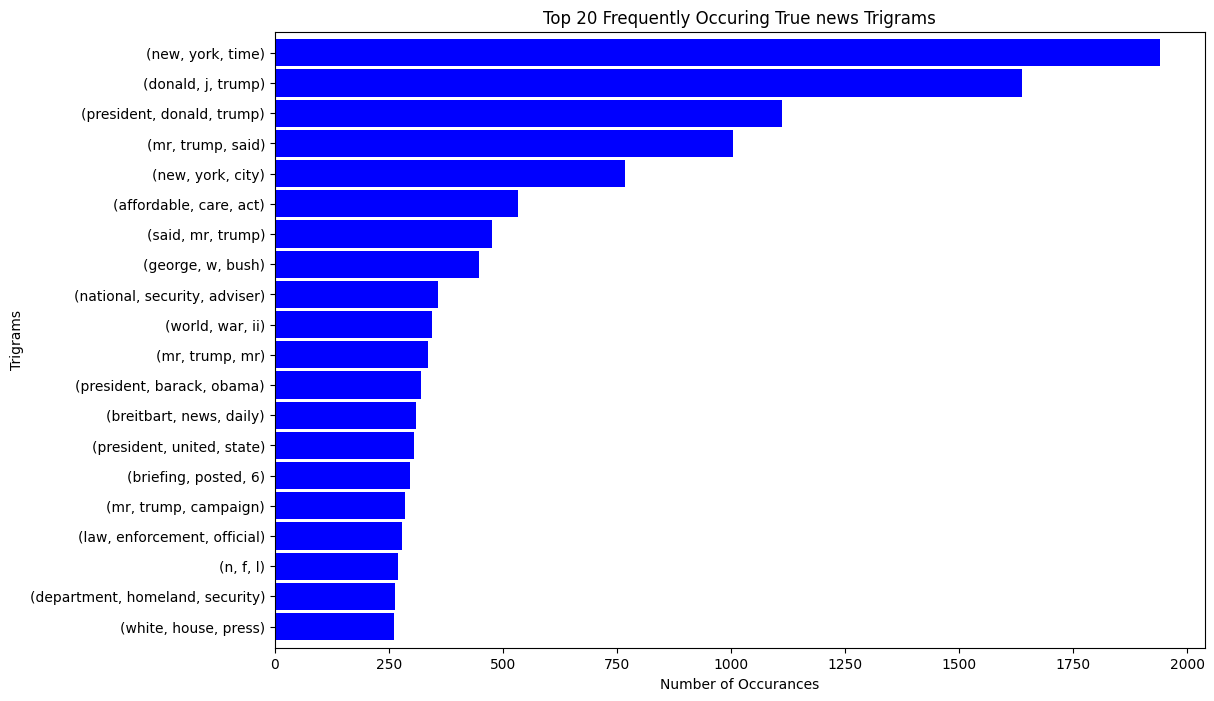

In [31]:
true_trigrams = (pd.Series(nltk.ngrams(true_news.split(), 3)).value_counts())[:20]
true_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring True news Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Number of Occurances')
plt.show();

### Most frequent Trigram(Three word combination) of Fake label

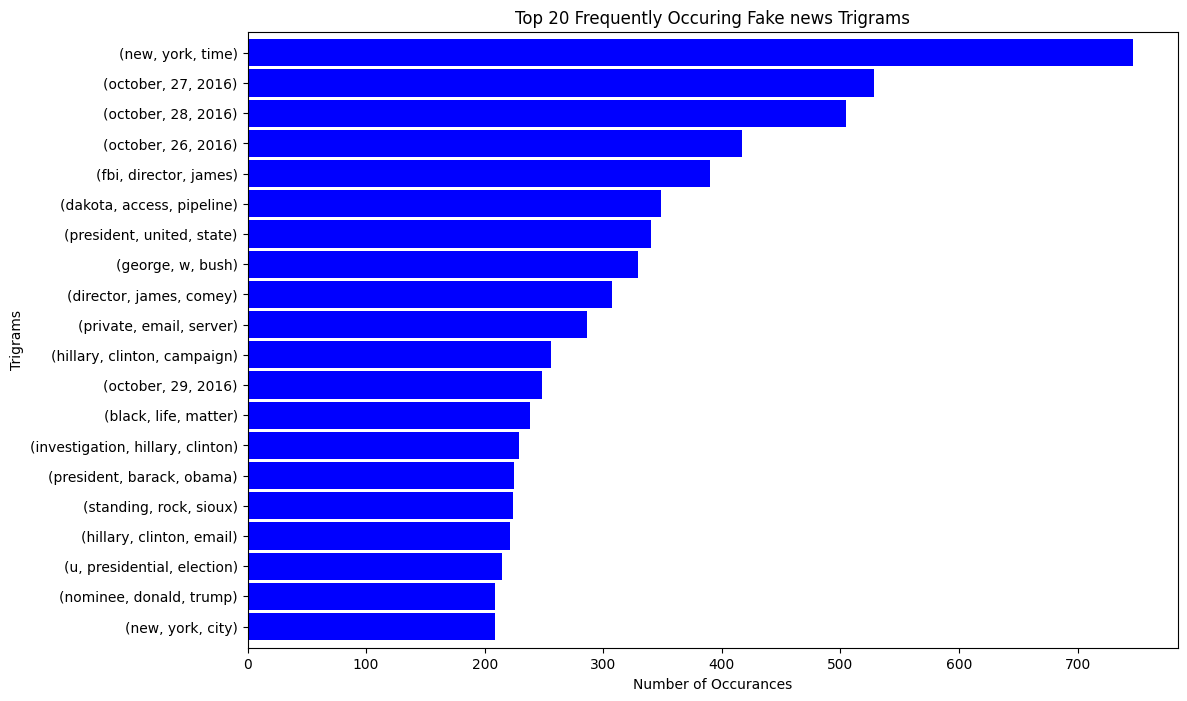

In [32]:
fake_trigrams = (pd.Series(nltk.ngrams(fake_news.split(), 3)).value_counts())[:20]
fake_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring Fake news Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Number of Occurances')
plt.show();

#### Hence from Word cloud as well as Different N-gram word anaysis it is difficult to conclude anything. So we will include all words to train our model.

## Splitting training dataset into train and test for model selection and validation
   - Merge all Text Feature
   - Split datasets in Train, Test


In [33]:
# Merge Text and title features together
def merge_text_features(df, text_featuers):
    df['news']=df[text_featuers].agg(' '.join, axis=1)
    print("Merge news text statistics::\n ",df.news.str.split().str.len().describe())
    return df

# Preperaing Datasets
def preparing_datasets(df, text_features):
    XY = merge_text_features(df, text_features)
    print(" Cleaning as remove special character is done..")
    print(XY.head())
    X = XY['news']
    y = XY.label
    print("Text len statistic after Merge news and preprocessing::\n ",X.str.split().str.len().describe())
    if  y.dtype=='object':
        y= process_labels(y)
    return X,y

In [34]:
## preprocessing datasets
print("\nTraining data preprocessing")
X, y = preparing_datasets(df, text_features)

print("\n\n\nTest data preprocessing")
X_test, y_test = preparing_datasets(df_test, text_features)



Training data preprocessing
Merge news text statistics::
  count    20800.000000
mean       440.236490
std        490.971666
min          1.000000
25%        166.000000
50%        331.000000
75%        602.000000
max      20731.000000
Name: news, dtype: float64
 Cleaning as remove special character is done..
                                               title  \
0  house dem aide didnt even see comeys letter ja...   
1   flynn hillary clinton big woman campus breitbart   
2                              truth might get fired   
3   15 civilian killed single u airstrike identified   
4  iranian woman jailed fictional unpublished sto...   

                                                text  label  \
0  house dem aide didnt even see comeys letter ja...      1   
1  ever get feeling life circle roundabout rather...      0   
2  truth might get fired october 29 2016 tension ...      1   
3  video 15 civilian killed single u airstrike id...      1   
4  print iranian woman sentenced six 

**There we can observe that mean number word for each news record is 471 and 75% quartile words length is in the range of 600-650. So based on this statistic, we can fix our word sequence using any suitable size for all news length as equal size.**

## Data Preperation

## Sequence Data Transformation :
   - **Tokenization** - Keras tokenizer to convert each text into a sequence of words, and then create the vocabulary using method on the tokenizer
   - **Text sequence generation** - Transforms each text in texts to a sequence of integers
   - **Pad the text sequence data** - Padding used to make length of sequence equal for all input

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
# The fit_on_texts() function is used to train a tokenizer on a list of texts.
# The tokenizer will learn the vocabulary of the texts and assign a unique integer to each word
def prepare_tokenizer(X):
    # it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
    oov_token = "<OOV>"

    #the maximum number of words to keep, based on word frequency
    vocab_size = 100000

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
    text = X
    tokenizer.fit_on_texts(text)
    word_index = tokenizer.word_index
    print("Word Index ")
    print(len(word_index.keys()))
    return tokenizer, word_index

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## Split datasets into train test sets to evalute mode with test size: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# X_train, y_train = X,y
print("Train data counts::",X_train.shape)
print("Test data counts::",X_test.shape)

max_text_length = 100
#vocab_size = len(word_index)

text_tokenizer, word_index = prepare_tokenizer(X_train)

Train data counts:: (16640,)
Test data counts:: (4160,)
Word Index 
179401


In [38]:
def prepare_seqence_data(df, tokenizer):
    # Transforms each text in texts to a sequence of integers.
    # Create Sequence
    print(" Create Sequence of tokens ")
    text_sequences = tokenizer.texts_to_sequences(df)

#     # Missing words in Glove vectors
#     words_used = [tokenizer.index_word[i] for i in range(1, vocab_size)]
#     missing_words = set(words_used) - set(word_vec.index.values)
#     print(len(missing_words))
#     missing_word_index = [tokenizer.word_index[word] for word in missing_words]

#     # Deleting above missing words
#     text_sequences = [[word for word in sentence if word not in missing_word_index] for sentence in text_sequences]
    print("Text to sequence of Id:: ", text_sequences[0:1])
    return text_sequences


In [39]:
padding_type = "post" # Type of padding pre or post of input sequence
trunction_type="post" # Type of truncation used to truncate input sequence if exceed from maximum sequence length

def pad_sequence_data(text_sequences, max_text_length):
    # Pad the Sequences, because the sequences are not of the same length,
    # so let’s pad them to make them of similar length
    text_padded = pad_sequences(text_sequences, maxlen=max_text_length, padding=padding_type,
                                          truncating=trunction_type)
    return text_padded

In [44]:
train_text_sequences = prepare_seqence_data(X_train, text_tokenizer)
test_text_sequences = prepare_seqence_data(X_test, text_tokenizer)

train_text_padded = pad_sequence_data(train_text_sequences, max_text_length)
test_text_padded = pad_sequence_data(test_text_sequences, max_text_length)

print("Padded Sequence :: ", test_text_padded[0:1])

print(" Tokenizer detail :: ", text_tokenizer.document_count)
print('Vocabulary size:', len(text_tokenizer.word_counts))
print('Shape of data padded:', train_text_padded.shape)

 Create Sequence of tokens 
Text to sequence of Id::  [[27, 810, 158, 295, 2057, 1145, 1552, 1215, 62, 1502, 192, 323, 1344, 309, 331, 1339, 27, 810, 158, 295, 2057, 1145, 1552, 1215, 62, 1502, 192, 323, 1344, 1657, 1199, 79, 965, 211, 92652, 92653, 302, 53, 302, 2684, 13890, 540, 13530, 213, 7702, 38, 4860, 122, 67, 2751, 15902, 98, 1795, 2847, 32187, 735, 501, 122, 12777, 1156, 12777, 1156, 706, 1009, 4917, 2057, 122, 1823, 3887, 2121, 623, 699, 31, 2864, 1928, 129, 847, 1009, 4917, 2057, 122, 2289, 177, 1569, 4917, 1684, 2815, 12777, 1156, 188, 628, 237, 1574, 1061]]
 Create Sequence of tokens 
Text to sequence of Id::  [[4249, 1450, 60, 1555, 435, 194, 17, 1069, 4, 60, 184, 22, 703, 218, 895, 1450, 1555, 9, 435, 194, 1590, 1146, 17, 8, 48, 1069, 1202, 435, 194, 17, 1069, 4, 50, 42, 348, 562, 60, 435, 402, 234, 66936, 1653, 958, 1698, 1199, 1032, 488, 32, 67, 60, 3632, 92, 5128, 2, 1069, 4, 50, 42, 1764, 92, 2, 1069, 60, 1042, 60, 22, 958, 1764, 1555, 435, 134, 3952, 92, 5128, 2, 76

## Feature Engineering

### Text Encoding : Vectorization
- One Hot encoding
- count vector, eg: TFIDF
- Word embedding
    - Word2Vec
    - GLOVE
    - FASTEXT
    - etc
    
**In this section we will use GLOVE to convert text into numeric vector representation**

## Word Embedding
- Word embdding take care of word reprenetation
- Word embedding algorithms can figure out tons of relationships from the text data. They use the idea of context and learn by seeing what word occurs near other words. It can represent words with fixed number of dimension instead of One-hot or count reprsentation with huge number of vocablury size.
- There are many popular word embedding algorithms available out there. Glove and Word2Vec are the most popular ones.
- We will use here Glove embedding
- Glove trained on Gigaword corpus (400,000 word vectors based on 6 billion tokens), available as 50d, 100d, 200d, and 300d vectors

In [64]:
##### Create GLove Word embedding #########
#### Download glove if not exist ########

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

def read_glove_embedings(glove_file, vocab_size):
    word_vector = pd.read_table(glove_file, sep=" ", header=None, engine='python', quoting=3)
    #word_vec = pd.read_table(glove_file, sep=" ", header=None, engine='python', encoding='utf-8'
    word_vector.set_index(0, inplace=True)

    print('Found %s word vectors.' % len(word_vector))
    return word_vector

# Golve embedding use tokenizer for
# word index, vocab size
def generate_glove_embedings(tokenizer, glove_file, vocab_size, emb_dim):
    embedding_index = read_glove_embedings(glove_file, vocab_size)
    embedding_matrix = np.zeros((vocab_size, emb_dim))
    print('\nembedding_matrix -\n', embedding_matrix)

    print('\ntokenizer.word_index.items() -\n', tokenizer.word_index.items())

    for word, i in tokenizer.word_index.items():
      if i < vocab_size and word in embedding_index.index:
        embedding_matrix[i] = embedding_index.loc[word].values
        if i%100 == 0:
          print('Completed {}th words'.format(i))

    #embedding_weights = np.zeros((10000, 50))
    # index_n_word = [(i, tokenizer.index_word[i]) for i in range(1, len(embedding_matrix)) if
    #                 tokenizer.index_word[i] in embedding_index.index]
    # idx, word = zip(*index_n_word)
    # embedding_matrix[idx, :] = embedding_index.loc[word, :].values

    return embedding_matrix

# def onehot_embedding(tokenizer):
#     onehot_vec =  [one_hot(words, (len(tokenizer.word_counts) +1)) for words in tokenizer.word_index.keys()]
#     embedded_docs = pad_sequences(onehot_vec, padding='pre', maxlen=max_text_length)
#     return embedded_docs

def build_embeddings(tokenizer, embedding_type, glove_file, vocab_len, emb_dim):
    print(" vocab_len/ vocab_size -", vocab_len)

    if embedding_type=='glove':
        embedding_matrix =  generate_glove_embedings(tokenizer, glove_file, vocab_len, emb_dim)
        print(" Encoded word sequence:: ",embedding_matrix[0:10])
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   weights=[embedding_matrix], trainable=False)
    # elif embedding_type=='fasttext':
    #     embedding_matrix =  fasttext_embedings()
    #     embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
    #                                weights=[embedding_matrix], trainable=False)
    # else:
    #     embedding_matrix = onehot_embedding(tokenizer)
    #     embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
    #                                trainable=False)

    return embeddingLayer

In [65]:
## COnstants for Word Embeddings
##########################
## Embedding Parametrs ###

emb_dim = 100
embedding_type = 'glove'
glove_dir = '/content/drive/My Drive/Colab Notebooks/Projects-NLP/fake-news-classification-using-deeplearning/input/glove/'
glove_file = glove_dir+"glove.6B."+str(emb_dim)+"d.txt"
vocab_size = len(word_index)+1
embeding_layer = build_embeddings(text_tokenizer, embedding_type, glove_file, vocab_size, emb_dim)

 vocab_len/ vocab_size - 179402


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Completed 100th words
Completed 200th words
Completed 300th words
Completed 400th words
Completed 500th words
Completed 600th words
Completed 700th words
Completed 800th words
Completed 900th words
Completed 1000th words
Completed 1100th words
Completed 1200th words
Completed 1300th words
Completed 1400th words
Completed 1500th words
Completed 1600th words
Completed 1700th words
Completed 1800th words
Completed 1900th words
Completed 2000th words
Completed 2100th words
Completed 2200th words
Completed 2300th words
Completed 2400th words
Completed 2500th words
Completed 2600th words
Completed 2700th words
Completed 2800th words
Completed 2900th words
Completed 3000th words
Completed 3100th words
Completed 3200th words
Completed 3300th words
Completed 3400th words
Completed 3500th words
Completed 3600th words
Completed 3700th words
Completed 3800th words
Completed 3900th words
Completed 4000th words
Completed 4100th words
Completed 4200th words
Completed 4300th words
Completed 4400th wor

AttributeError: ignored

## Building Sequence Model
### Approach:
1. Recurrent Neural Network: Simple RNN
2. Long Short Time Memory
3. GRU

### Steps to build Sequence Network

1. Input Layer
    - In Text case input woud be sequence of worde index
    - (Max_sequence_length,number_training_size)
    ---------------------------------------------
2. Embedding Layer
    - This layer convert each word index into vector representation of size(50,100,200,300)
    - This could be One-hot or pre-trained(glove or fastetxt) or trainiable word2Vec(example: using gensim)
    - One-hot would represent each word to size of vocabulary size
    - In this experiment we used pre-trained model: glove with 50 and 100 dimension vector.
    - embedding layer input: Input
    - Output: (training_size,Max_sequence_length,embedding_dimension )
    ---------------------------------------------
3. Hidden layer: RNN/LSTM/GRU
    - input: embedding output
    - output: (training_size,no_of_nurons)    
    -------------------------------------------
4. Stacked Layer: Multiple layer of RNN/LSTM/GRU can be repeated
    - Stack layer need to return the same sequence from previous layer
    - return_sequence = True
    - because RNN/LSTM/GRU need the same sequence of input  
    -------------------------------------------------------------------
5. Dense Layer:
    - collect final context output from Sequence layer
    - Activation function: Relu    
    ---------------------------------------------------
6. Dropout/Batchnormalization after hidden layer if rquire, which is regularization technique to avoid over-fitting/vanishing gradiant.
    
    ----------------------------------------------------------------------------------------
    
7. Multiple Dense layer if require
    
    -------------------------------------------------------------------------------
    
8. Output Layer:
    - Sigmoid: Activation function for binary class
    

### Parameter to Tune
- Vocabulary length
- max sequence length
- Embedding size: 50/100/200/300
- Neural Network: RNN/GRU/LSTM
- No of Sequence layer
- No.of Dense Hidden Layers
- Dropout
- Hidden layer dimension
- No. of Epochs
- Batch size

In [73]:
#####################
###  PARAMS  ###
#####################
sequence_neuron_size = 100
hidden_layer_1 = 32
epochs = 20
batch_size = 256
classifier = 'binary'

## Build Recurrent Neural Network

In [96]:
import matplotlib.pyplot as plt
from tensorflow.python.keras import Input
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GRU, SimpleRNN
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from datetime import date
from os.path import exists

#Building Sequential network with
#   Embeding Layer
#   LSTM
#   Dense
#   Output Layer
def build_LSTM_network(embedding_layer, sequence_neuron_size):

    print(" Building Sequential network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(sequence_neuron_size))#, return_sequences=True))
    #model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_GRU_network(embedding_layer, sequence_neuron_size):

    print(" Building GRU network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(GRU(sequence_neuron_size))#, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(hidden_layer_1, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_RNN_network(embedding_layer, sequence_neuron_size):

    print(" Building RNN network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(SimpleRNN(sequence_neuron_size))#, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(hidden_layer_1, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

def model_training(model,X_train,y_train,X_test, y_test):

    # Compile Model with loss function,
    # optimizer and metricecs as minimum parameter
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    # Train model with Train and test set data
    # Number of epochs, batch size as minimum parameter
    history = model.fit(X_train, y_train, epochs=epochs,batch_size = batch_size ,validation_split=0.2)#validation_data=(X_test, y_test))
    return model, history

def performance_history(history, model_type, name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    plt.savefig(model_dir + model_type +'/' + name + "_performance.jpeg")

def evaluate_model(model,X_test,y_test):
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score

def store_model(model,model_type,name):
    # Store the model as json and
    # store model weights as HDF5

    # serialize model to JSON
    model_json = model.to_json()
    with open(model_dir+model_type+'/'+ name +"_model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_dir + model_type +'/'+ name + "_model.h5")
    print("Saved model to disk")

def performance_report(model, testX, testy):

    time = date.today()

    yhat_probs = model.predict(testX, verbose=0)
    # predict crisp classes for test set
    yhat_classes = model.predict_classes(testX, verbose=0)

    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(testy, yhat_classes)
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes)
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes)
    print('F1 score: %f' % f1)

    if exists(output_dir + 'report.csv'):
        total_cost_df = pd.read_csv(output_dir + 'report.csv', index_col=0)
    else:
        total_cost_df = pd.DataFrame(
                columns=['time', 'name', 'Precision', 'Recall', 'f1_score', 'accuracy'])

    total_cost_df = total_cost_df.append(
            {'time': time, 'name': name,'Precision': precision, 'Recall': recall, 'f1_score': f1,'accuracy':accuracy},
            ignore_index=True)
    total_cost_df.to_csv(output_dir + 'report.csv')

### Training Steps:
- Build Network
- Compile
- Fit model to train
- Hyperparamter Tunning, If required
- Evaluate model with Test set

In [89]:
dash = "-"
name = "Model_"

In [90]:
%%time

## Build Network
model_type='RNN'
epochs = 20
batch_size = 256
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

model_rnn = build_RNN_network(embeding_layer, sequence_neuron_size, )

model_rnn,history = model_training(model_rnn, train_text_padded, y_train, test_text_padded, y_test)

 Building RNN network 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          17940200  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                3232      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17963565 (68.53 M

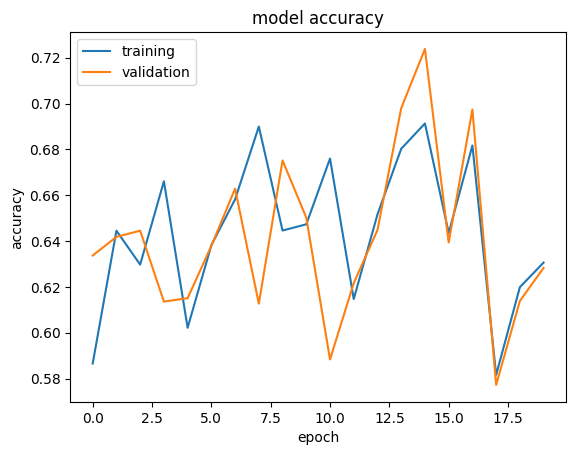

Saved model to disk
Test loss: 0.6247637867927551 / Test accuracy: 0.6401442289352417


[0.6247637867927551, 0.6401442289352417]

<Figure size 640x480 with 0 Axes>

In [98]:
performance_history(history, model_type, name)
store_model(model_rnn, model_type, name)
evaluate_model(model_rnn,test_text_padded,y_test)
# performance_report(model_rnn, test_text_padded, y_test)

### Running GRU network

In [100]:
%%time

## Build Network
model_type = 'GRU'
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

model_gru = build_GRU_network(embeding_layer, sequence_neuron_size)

model_gru,history_gru = model_training(model_gru,train_text_padded,y_train,test_text_padded, y_test)

 Building GRU network 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          17940200  
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                3232      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18004065 (68.68 M

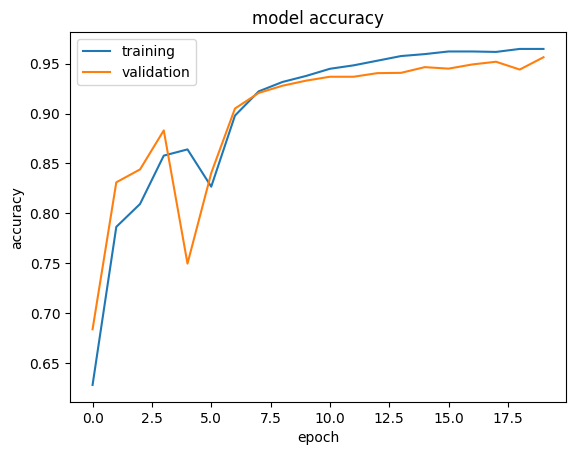

Saved model to disk
Test loss: 0.11906696856021881 / Test accuracy: 0.9620192050933838


[0.11906696856021881, 0.9620192050933838]

<Figure size 640x480 with 0 Axes>

In [101]:
model_type = 'GRU'
performance_history(history_gru,model_type,name)
store_model(model_gru,model_type,name)
evaluate_model(model_gru,test_text_padded,y_test)
# performance_report(model_gru,test_text_padded,y_test)

### Running LSTM network

In [102]:
%%time
model_type = 'LSTM'
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

## Build Network
model_lstm = build_LSTM_network(embeding_layer, sequence_neuron_size)

model_lstm, history_lstm = model_training(model_lstm,train_text_padded,y_train,test_text_padded, y_test)

 Building Sequential network 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          17940200  
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                3232      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 18023865 (

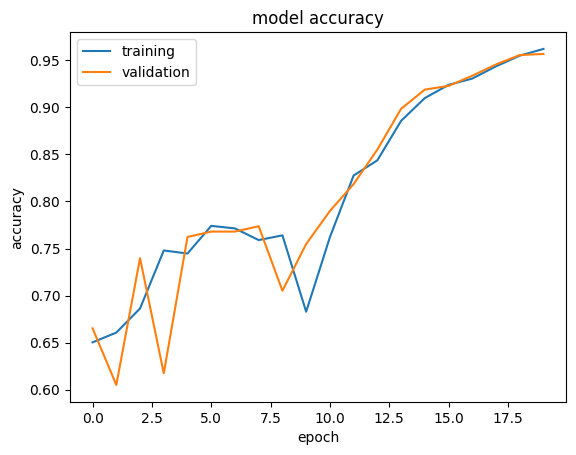

Saved model to disk
Test loss: 0.12197762727737427 / Test accuracy: 0.9550480842590332


[0.12197762727737427, 0.9550480842590332]

<Figure size 640x480 with 0 Axes>

In [103]:
performance_history(history_lstm,model_type,name)
store_model(model_lstm,model_type,name)
evaluate_model(model_lstm,test_text_padded,y_test)
# performance_report(model_lstm,test_text_padded,y_test)

#### Train Model and Evaluate Model

From above experience, GRUs train faster and perform better than LSTMs on less training data.
- GRUs are simpler and thus easier to modify, for example adding new gates in case of additional input to the network. It's just less code in general.
- LSTMs should in theory remember longer sequences than GRUs and outperform them in tasks requiring modeling long-distance relations.

*Reference Paper.*
[Neural GPUs Learn Algorithms](https://arxiv.org/abs/1511.08228)
[Comparative Study of CNN and RNN for Natural Language Processing](https://arxiv.org/abs/1702.01923)